Problem statement: To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

### Importing Skin Cancer Data
#### To do: Take necessary actions to read the data

### Importing all the important libraries

In [12]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [13]:
## If you are using the data by mounting the google drive, use the following :
from google.colab import drive
drive.mount('/content/gdrive')

##Ref:https://towardsdatascience.com/downloading-datasets-into-google-drive-via-google-colab-bcb1b30b0166

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [14]:

import os
os.chdir('/content/gdrive/MyDrive/Colab Notebooks/')  #change dir


In [15]:
!mkdir CNN_assignment #Create a directory named cnn_assignment
#!mkdir train  #create a directory named train/
#!mkdir test  #create a directory named test/
!unzip -q CNN_assignment.zip -d CNN_assignment/
#!unzip -q train.zip -d train/  #unzip data in train/
#!unzip -q test.zip -d test/  #unzip data in test/
#!unzip sample_submission.csv.zip
#!unzip train_labels.csv.zip

mkdir: cannot create directory ‘CNN_assignment’: File exists
replace CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0010512.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0010889.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0024468.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0024470.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0024511.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/I

This assignment uses a dataset of about 2357 images of skin cancer types. The dataset contains 9 sub-directories in each train and test subdirectories. The 9 sub-directories contains the images of 9 skin cancer types respectively.

In [22]:
# Defining the path for train and test images
## Todo: Update the paths of the train and test dataset
data_dir_test = pathlib.Path("/content/gdrive/MyDrive/Colab Notebooks/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Test")
data_dir_train = pathlib.Path('/content/gdrive/MyDrive/Colab Notebooks/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train')

In [23]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2239
118


### Load using keras.preprocessing

Let's load these images off disk using the helpful image_dataset_from_directory utility.

### Create a dataset

Define some parameters for the loader:

In [24]:
batch_size = 32
img_height = 180
img_width = 180

Use 80% of the images for training, and 20% for validation.

In [25]:
## Write your train dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    labels="inferred",
    label_mode="int",
    color_mode="rgb",
    batch_size=32,
    image_size=(180,180),
    seed=123,
    validation_split=0.2,
    subset="training",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 2239 files belonging to 9 classes.
Using 1792 files for training.


In [26]:
## Write your validation dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    labels="inferred",
    label_mode="int",
    color_mode="rgb",
    batch_size=32,
    image_size=(180, 180),
    seed=123,
    validation_split=0.2,  # 20% for validation
    subset="validation"
)

Found 2239 files belonging to 9 classes.
Using 447 files for validation.


In [27]:
# List out all the classes of skin cancer and store them in a list. 
# You can find the class names in the class_names attribute on these datasets. 
# These correspond to the directory names in alphabetical order.
class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


### Visualize the data
#### Todo, create a code to visualize one instance of all the nine classes present in the dataset

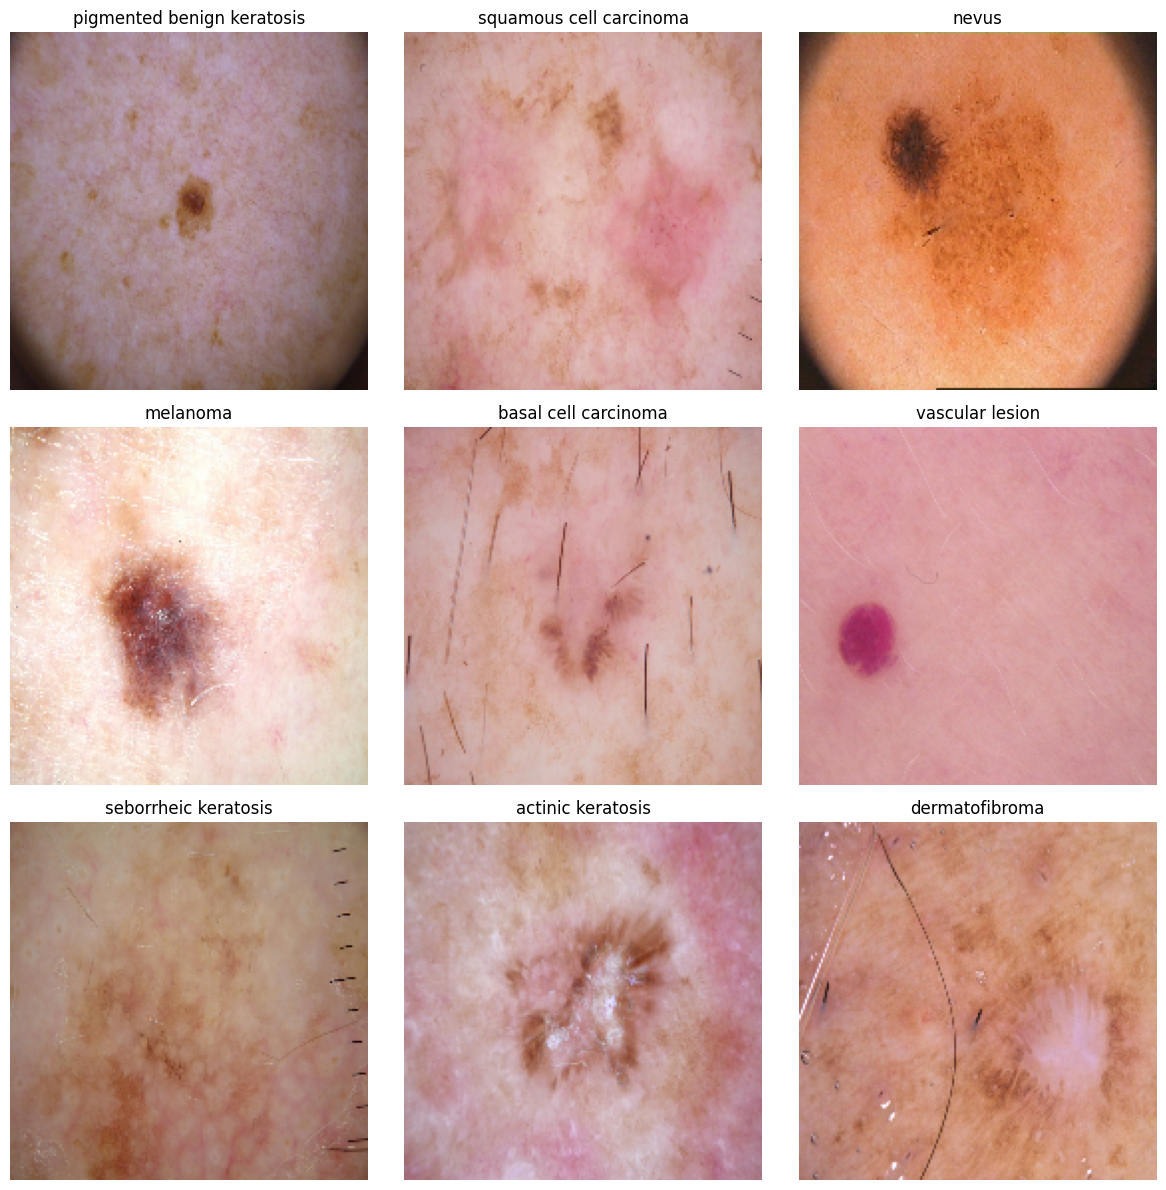

In [29]:
import matplotlib.pyplot as plt

### your code goes here, you can use training or validation data to visualize
# Get the unique labels/classes in the train dataset
class_names = train_ds.class_names

# Create a dictionary to store one instance from each class
class_instances = {}

# Iterate over the train dataset to find one instance from each class
for images, labels in train_ds:
    for image, label in zip(images, labels):
        class_name = class_names[label]
        if class_name not in class_instances:
            class_instances[class_name] = image
            break

# Visualize one instance from each class
plt.figure(figsize=(12, 12))
for i, class_name in enumerate(class_instances.keys()):
    image = class_instances[class_name]
    ax = plt.subplot(3, 3, i+1)
    plt.imshow(image.numpy().astype("uint8"))
    plt.title(class_name)
    plt.axis("off")
plt.tight_layout()
plt.show()


The `image_batch` is a tensor of the shape `(32, 180, 180, 3)`. This is a batch of 32 images of shape `180x180x3` (the last dimension refers to color channels RGB). The `label_batch` is a tensor of the shape `(32,)`, these are corresponding labels to the 32 images.

`Dataset.cache()` keeps the images in memory after they're loaded off disk during the first epoch.

`Dataset.prefetch()` overlaps data preprocessing and model execution while training.

In [30]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

### Create the model
#### Todo: Create a CNN model, which can accurately detect 9 classes present in the dataset. Use ```layers.experimental.preprocessing.Rescaling``` to normalize pixel values between (0,1). The RGB channel values are in the `[0, 255]` range. This is not ideal for a neural network. Here, it is good to standardize values to be in the `[0, 1]`

In [31]:
### Your code goes here
# Define the number of classes
num_classes = 9

# Create the CNN model
model = tf.keras.Sequential([
    layers.experimental.preprocessing.Rescaling(1./255, input_shape=(180, 180, 3)),
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes, activation='softmax')
])

### Compile the model
Choose an appropirate optimiser and loss function for model training 

In [32]:
### Todo, choose an appropirate optimiser and loss function
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

In [33]:
# View the summary of all layers
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 90, 90, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 45, 45, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 45, 45, 64)        1

### Train the model

In [34]:
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 [==============================] - 54s 549ms/step - loss: 1.9690 - accuracy: 0.2757 - val_loss: 1.6950 - val_accuracy: 0.3781
Epoch 2/20
56/56 [==============================] - 1s 24ms/step - loss: 1.6720 - accuracy: 0.4029 - val_loss: 1.5341 - val_accuracy: 0.4743
Epoch 3/20
56/56 [==============================] - 1s 21ms/step - loss: 1.4391 - accuracy: 0.4944 - val_loss: 1.4269 - val_accuracy: 0.4855
Epoch 4/20
56/56 [==============================] - 1s 21ms/step - loss: 1.3533 - accuracy: 0.5402 - val_loss: 1.3673 - val_accuracy: 0.5280
Epoch 5/20
56/56 [==============================] - 1s 21ms/step - loss: 1.2412 - accuracy: 0.5664 - val_loss: 1.3709 - val_accuracy: 0.5190
Epoch 6/20
56/56 [==============================] - 1s 21ms/step - loss: 1.1981 - accuracy: 0.5809 - val_loss: 1.3756 - val_accuracy: 0.5593
Epoch 7/20
56/56 [==============================] - 1s 21ms/step - loss: 1.1068 - accuracy: 0.5960 - val_loss: 1.4424 - val_accuracy: 0.5190
Epoch 8/20


### Visualizing training results

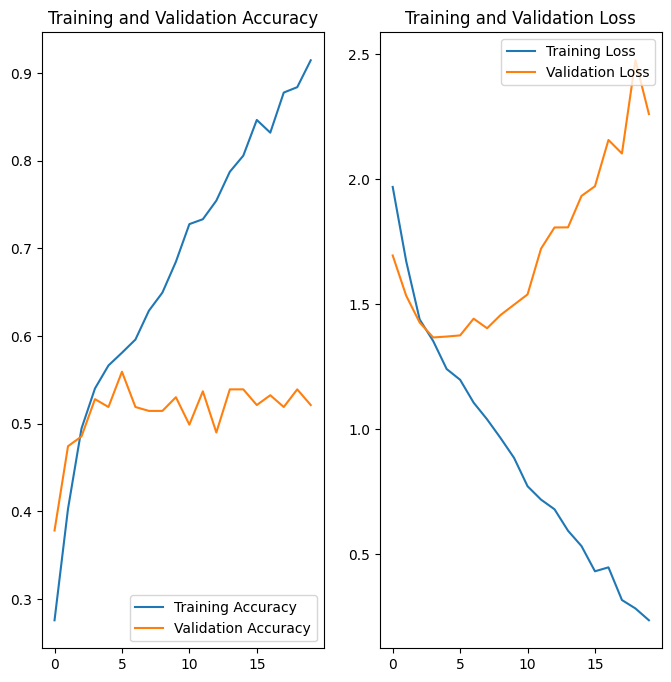

In [35]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit

### Write your findings here



---



---


**From the graphs above it is clear that the model is overfitting, this can be seen from the fact that training accuracy is >85% while validation accuracy is less than 60%.**

---



In [36]:
# Todo, after you have analysed the model fit history for presence of underfit or overfit, choose an appropriate data augumentation strategy. 
# Your code goes here
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Create an instance of the ImageDataGenerator with desired augmentation options
datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    preprocessing_function=tf.keras.applications.mobilenet_v2.preprocess_input
)

# Define a custom brightness augmentation function
def apply_brightness(image):
    # Adjust brightness using tf.image API
    brightness_factor = tf.random.uniform(shape=[1], minval=0.9, maxval=1.1)
    adjusted_image = tf.image.adjust_brightness(image, delta=brightness_factor)
    return adjusted_image

# Apply data augmentation to the training dataset
augmented_train_ds = train_ds.map(lambda x, y: (apply_brightness(x), y))

In [37]:
# Concatenate the original training dataset and the augmented training dataset
combined_train_ds = tf.data.Dataset.concatenate(train_ds, augmented_train_ds)

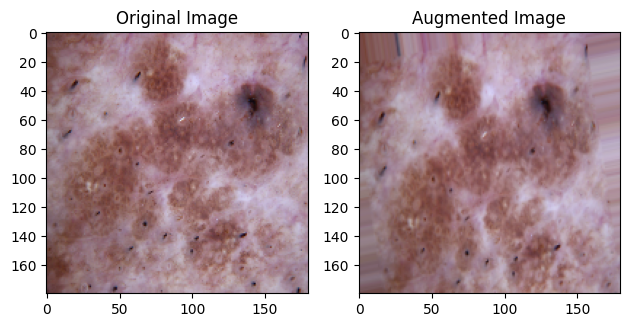

In [38]:
# Select one instance from the augmented training dataset
sample_image, _ = next(iter(augmented_train_ds))

# Convert the image from EagerTensor to NumPy array
sample_image = sample_image[0].numpy()

# Plot the original image
plt.subplot(1, 2, 1)
plt.imshow(sample_image.astype('uint8'))
plt.title('Original Image')

# Plot the augmented image
plt.subplot(1, 2, 2)
augmented_image = datagen.random_transform(sample_image)
plt.imshow(augmented_image.astype('uint8'))
plt.title('Augmented Image')

plt.tight_layout()
plt.show()

### Todo:
### Create the model, compile and train the model


In [40]:
## You can use Dropout layer if there is an evidence of overfitting in your findings

## Your code goes here
# Normalize pixel values between 0 and 1
normalization_layer = layers.experimental.preprocessing.Rescaling(1./255)

# Create a CNN model
model = tf.keras.Sequential([
    normalization_layer,
    layers.Conv2D(32, 3, activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(),
    layers.Conv2D(128, 3, activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dropout(0.5),
    layers.Dense(128, activation='relu'),
    layers.BatchNormalization(),
    layers.Dense(9, activation='softmax')
])


### Compiling the model

In [41]:
## Your code goes here
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

### Training the model

In [42]:
## Your code goes here, note: train your model for 20 epochs
epochs = 20
model.fit(combined_train_ds, epochs=20, validation_data=val_ds)

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/backend.py:5612: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


112/112 [==============================] - 11s 48ms/step - loss: 1.5169 - accuracy: 0.4992 - val_loss: 3.3558 - val_accuracy: 0.1499
Epoch 2/20
112/112 [==============================] - 5s 47ms/step - loss: 0.9606 - accuracy: 0.6688 - val_loss: 4.8051 - val_accuracy: 0.1521
Epoch 3/20
112/112 [==============================] - 5s 45ms/step - loss: 0.5636 - accuracy: 0.8105 - val_loss: 3.2775 - val_accuracy: 0.1790
Epoch 4/20
112/112 [==============================] - 5s 46ms/step - loss: 0.3006 - accuracy: 0.9060 - val_loss: 2.1441 - val_accuracy: 0.4072
Epoch 5/20
112/112 [==============================] - 5s 46ms/step - loss: 0.1771 - accuracy: 0.9439 - val_loss: 1.9452 - val_accuracy: 0.4116
Epoch 6/20
112/112 [==============================] - 5s 48ms/step - loss: 0.0971 - accuracy: 0.9688 - val_loss: 2.1826 - val_accuracy: 0.4474
Epoch 7/20
112/112 [==============================] - 5s 44ms/step - loss: 0.0642 - accuracy: 0.9802 - val_loss: 1.6971 - val_accuracy: 0.5682
Epoch 8/2

### Visualizing the results

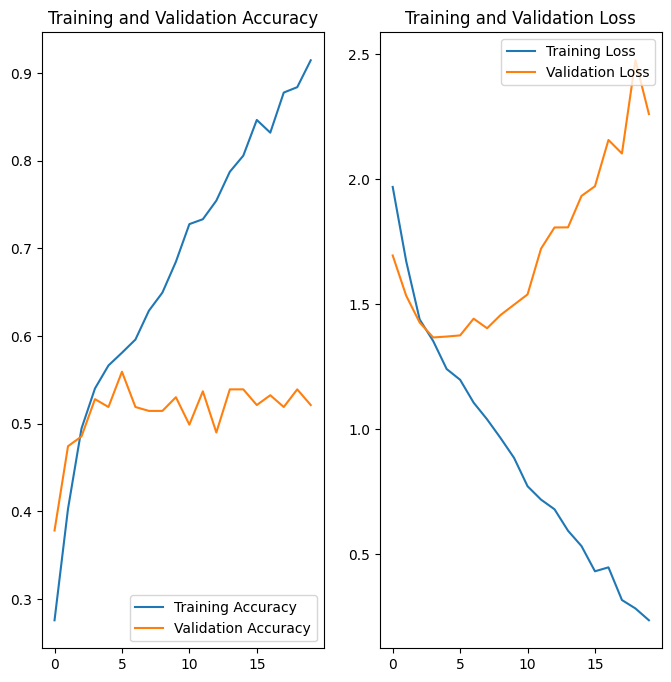

In [43]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit. Do you think there is some improvement now as compared to the previous model run?



---
Past iteration: loss: 0.3204 - accuracy: 0.8811 - val_loss: 2.4409 - val_accuracy: 0.5615
---
Current Iteration: loss: 0.0047 - accuracy: 0.9986 - val_loss: 2.0372 - val_accuracy: 0.5705
---

Thus it can be seen that though there is marginal increase in Training accuracy, the validation accuracy is still bad. Thus it can be interpreted that there is overfitting



#### **Todo:** Find the distribution of classes in the training dataset.
#### **Context:** Many times real life datasets can have class imbalance, one class can have proportionately higher number of samples compared to the others. Class imbalance can have a detrimental effect on the final model quality. Hence as a sanity check it becomes important to check what is the distribution of classes in the data.

In [44]:
## Your code goes here.
# Initialize a dictionary to store the class distribution
class_distribution = {}
# Iterate through the training dataset and count class occurrences
for _, labels in train_ds:
    for label in labels.numpy():
        if label in class_distribution:
            class_distribution[label] += 1
        else:
            class_distribution[label] = 1

# Print the class distribution
print("Class Distribution in the Training Dataset:")
for class_label, count in class_distribution.items():
    print(f"Class {class_label}: {count} samples")

Class Distribution in the Training Dataset:
Class 5: 370 samples
Class 8: 115 samples
Class 0: 92 samples
Class 4: 277 samples
Class 1: 309 samples
Class 3: 352 samples
Class 2: 77 samples
Class 7: 142 samples
Class 6: 58 samples


#### **Todo:** Write your findings here: 
#### - Which class has the least number of samples?
***Class 6 has the least number of samples with 58 samples***
#### - Which classes dominate the data in terms proportionate number of samples?
**Class 5 dominates the data with 370 samples**

#### **Todo:** Rectify the class imbalance
#### **Context:** You can use a python package known as `Augmentor` (https://augmentor.readthedocs.io/en/master/) to add more samples across all classes so that none of the classes have very few samples.

In [45]:
!pip install Augmentor

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


To use `Augmentor`, the following general procedure is followed:

1. Instantiate a `Pipeline` object pointing to a directory containing your initial image data set.<br>
2. Define a number of operations to perform on this data set using your `Pipeline` object.<br>
3. Execute these operations by calling the `Pipeline’s` `sample()` method.


In [46]:
path_to_training_dataset='/content/gdrive/MyDrive/Colab Notebooks/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/'
import Augmentor
for i in class_names:
    p = Augmentor.Pipeline(path_to_training_dataset + i)
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.

Initialised with 114 image(s) found.
Output directory set to /content/gdrive/MyDrive/Colab Notebooks/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FC516B3FFA0>: 100%|██████████| 500/500 [00:28<00:00, 17.74 Samples/s]


Initialised with 376 image(s) found.
Output directory set to /content/gdrive/MyDrive/Colab Notebooks/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/basal cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FC486378700>: 100%|██████████| 500/500 [00:29<00:00, 17.20 Samples/s]


Initialised with 95 image(s) found.
Output directory set to /content/gdrive/MyDrive/Colab Notebooks/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/dermatofibroma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FC515373AF0>: 100%|██████████| 500/500 [00:24<00:00, 20.31 Samples/s]


Initialised with 438 image(s) found.
Output directory set to /content/gdrive/MyDrive/Colab Notebooks/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1024x768 at 0x7FC51532B2E0>: 100%|██████████| 500/500 [01:42<00:00,  4.88 Samples/s]


Initialised with 357 image(s) found.
Output directory set to /content/gdrive/MyDrive/Colab Notebooks/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/nevus/output.

Processing <PIL.Image.Image image mode=RGB size=962x723 at 0x7FC4864FA560>: 100%|██████████| 500/500 [01:48<00:00,  4.62 Samples/s]


Initialised with 462 image(s) found.
Output directory set to /content/gdrive/MyDrive/Colab Notebooks/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/pigmented benign keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FC518486770>: 100%|██████████| 500/500 [00:21<00:00, 22.85 Samples/s]


Initialised with 77 image(s) found.
Output directory set to /content/gdrive/MyDrive/Colab Notebooks/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/seborrheic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7FC486426020>: 100%|██████████| 500/500 [00:50<00:00,  9.92 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/gdrive/MyDrive/Colab Notebooks/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/squamous cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FC5002C7DC0>: 100%|██████████| 500/500 [00:21<00:00, 23.22 Samples/s]


Initialised with 139 image(s) found.
Output directory set to /content/gdrive/MyDrive/Colab Notebooks/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/vascular lesion/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7FC515361A20>: 100%|██████████| 500/500 [00:23<00:00, 21.41 Samples/s]


Augmentor has stored the augmented images in the output sub-directory of each of the sub-directories of skin cancer types.. Lets take a look at total count of augmented images.

In [47]:
image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)

4486


### Lets see the distribution of augmented data after adding new images to the original training data.

In [48]:
from glob import glob

In [49]:
path_list = [x for x in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
path_list

['/content/gdrive/MyDrive/Colab Notebooks/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/output/actinic keratosis_original_ISIC_0032437.jpg_e1206252-721f-4143-9e2f-58722dfe2835.jpg',
 '/content/gdrive/MyDrive/Colab Notebooks/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/output/actinic keratosis_original_ISIC_0026848.jpg_5cb39136-7492-4c2b-8326-fc793752cd8c.jpg',
 '/content/gdrive/MyDrive/Colab Notebooks/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/output/actinic keratosis_original_ISIC_0029133.jpg_8c1d7598-a26c-4b49-b7a6-5dff82dcc89f.jpg',
 '/content/gdrive/MyDrive/Colab Notebooks/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/output/actinic keratosis_original_ISIC_0031609.jpg_5820ea40-ab17-4580-b7cb-9ff47bba02b9.jpg',
 '/content/gdrive/MyDrive/Colab Notebooks/CNN_assign

In [50]:
lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
lesion_list_new

['actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic 

In [51]:
dataframe_dict_new = dict(zip(path_list, lesion_list_new))

In [52]:
df2 = pd.DataFrame(list(dataframe_dict_new.items()),columns = ['Path','Label'])


In [53]:
# Extract the data from the TensorFlow dataset
data = list(train_ds.as_numpy_iterator())

# Create a dictionary to store the data
data_dict = {"image": [], "label": []}

# Iterate through the data and populate the dictionary
for image, label in data:
    data_dict["image"].append(image)
    data_dict["label"].append(label)

# Create a pandas DataFrame from the data dictionary
df = pd.DataFrame(data_dict)

In [54]:
new_df = df.append(df2)

<ipython-input-54-3bfeadd58415>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df = df.append(df2)


In [56]:
new_df['Label'].value_counts()

actinic keratosis             500
basal cell carcinoma          500
dermatofibroma                500
melanoma                      500
nevus                         500
pigmented benign keratosis    500
squamous cell carcinoma       500
vascular lesion               500
seborrheic keratosis          486
Name: Label, dtype: int64

So, now we have added 500 images to all the classes to maintain some class balance. We can add more images as we want to improve training process.

#### **Todo**: Train the model on the data created using Augmentor

In [57]:
batch_size = 32
img_height = 180
img_width = 180

#### **Todo:** Create a training dataset

In [64]:
data_dir_train="/content/gdrive/MyDrive/Colab Notebooks/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/"
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'training',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6711 files belonging to 9 classes.
Using 5369 files for training.


#### **Todo:** Create a validation dataset

In [65]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset ='validation',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6711 files belonging to 9 classes.
Using 1342 files for validation.


#### **Todo:** Create your model (make sure to include normalization)

In [69]:
## your code goes here
# Normalize pixel values between 0 and 1
normalization_layer = layers.experimental.preprocessing.Rescaling(1./255)

# Create a CNN model
model = tf.keras.Sequential([
    normalization_layer,
    layers.Conv2D(32, 3, activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(),
    layers.Conv2D(128, 3, activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(),
    layers.Conv2D(128, 3, activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dropout(0.5),
    layers.Dense(128, activation='relu'),
    layers.BatchNormalization(),
    layers.Dense(9, activation='softmax')
])

#### **Todo:** Compile your model (Choose optimizer and loss function appropriately)

In [70]:
## your code goes here
# Compile the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

#### **Todo:**  Train your model

In [71]:
epochs = 30
## Your code goes here, use 50 epochs.
history = model.fit(train_ds, epochs=30, validation_data=val_ds)

Epoch 1/30
168/168 [==============================] - 91s 201ms/step - loss: 1.4639 - accuracy: 0.4904 - val_loss: 3.5339 - val_accuracy: 0.1155
Epoch 2/30
168/168 [==============================] - 36s 210ms/step - loss: 1.0215 - accuracy: 0.6273 - val_loss: 2.9729 - val_accuracy: 0.1498
Epoch 3/30
168/168 [==============================] - 35s 200ms/step - loss: 0.8049 - accuracy: 0.7132 - val_loss: 1.7435 - val_accuracy: 0.4262
Epoch 4/30
168/168 [==============================] - 36s 210ms/step - loss: 0.6733 - accuracy: 0.7568 - val_loss: 1.4594 - val_accuracy: 0.4918
Epoch 5/30
168/168 [==============================] - 37s 211ms/step - loss: 0.5513 - accuracy: 0.8013 - val_loss: 1.0912 - val_accuracy: 0.5976
Epoch 6/30
168/168 [==============================] - 35s 203ms/step - loss: 0.4398 - accuracy: 0.8450 - val_loss: 3.2982 - val_accuracy: 0.3204
Epoch 7/30
168/168 [==============================] - 37s 209ms/step - loss: 0.4220 - accuracy: 0.8536 - val_loss: 1.6564 - val_ac

#### **Todo:**  Visualize the model results

In [72]:
epochs=30

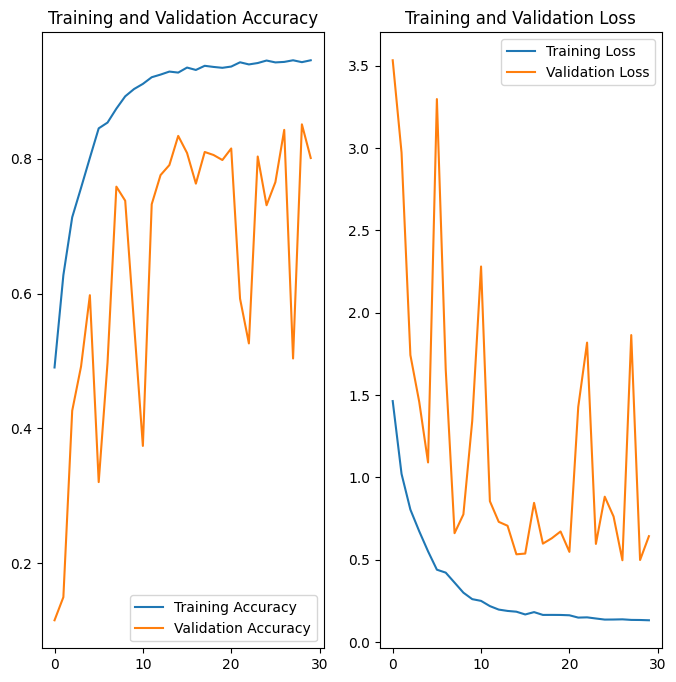

In [73]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### **Todo:**  Analyze your results here. Did you get rid of underfitting/overfitting? Did class rebalance help?



By addressing the class imbalance, the CNN model was able to better generalise the predictions. This can be seen from the fact that both the training dataset accuracy and validation dataset accuracy are well in acceptable ranges and there in not as much of a deviation as was seen earlier.

By using epochs of 30 we see a validation score of around 80%

Thus the current version of the CCN model is better as compared to the earlier models after it was trained on the augmented data.
